In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

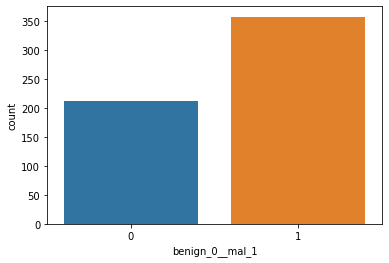

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

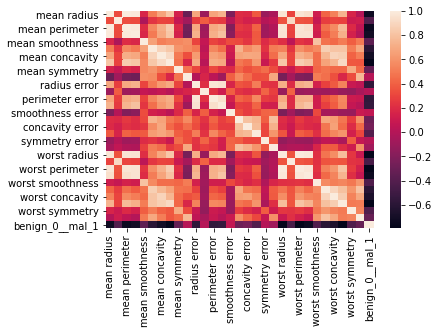

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

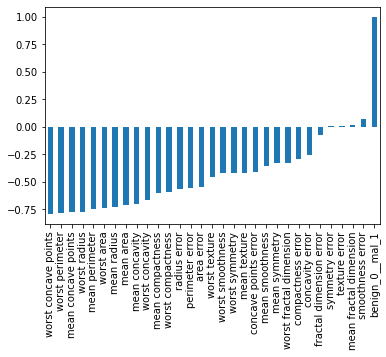

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

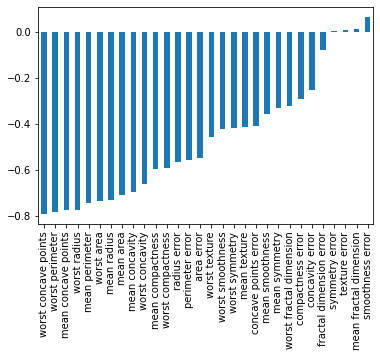

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Creating the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
## Training the Model 
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 39ms/step - loss: 0.6885 - val_loss: 0.6652
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6544 - val_loss: 0.6319
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6221 - val_loss: 0.5958
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5894 - val_loss: 0.5640
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5354 - val_loss: 0.5323
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5285 - val_loss: 0.4960
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4823 - val_loss: 0.4441
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4282 - val_loss: 0.3891
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3932 - val_loss: 0.3409
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3438 - val_loss: 0.2987
Epoch 11

In [ ]:
# model.history.history
model_loss = pd.DataFrame(model.history.history)

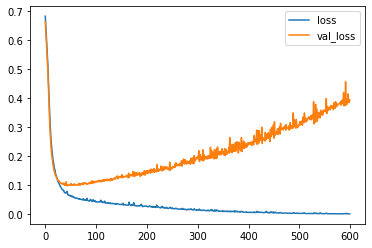

In [ ]:
# model_loss
model_loss.plot()

## Second: Early Stopping


In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6714 - val_loss: 0.6505
Epoch 2/600
426/426 [==============================] - 0s 568us/sample - loss: 0.6339 - val_loss: 0.6144
Epoch 3/600
426/426 [==============================] - 0s 674us/sample - loss: 0.5972 - val_loss: 0.5743
Epoch 4/600
426/426 [==============================] - 0s 639us/sample - loss: 0.5545 - val_loss: 0.5289
Epoch 5/600
426/426 [==============================] - 0s 377us/sample - loss: 0.5071 - val_loss: 0.4766
Epoch 6/600
426/426 [==============================] - 0s 775us/sample - loss: 0.4549 - val_loss: 0.4240
Epoch 7/600
426/426 [==============================] - 0s 675us/sample - loss: 0.4048 - val_loss: 0.3700
Epoch 8/600
426/426 [==============================] - 0s 396us/sample - loss: 0.3578 - val_loss: 0.3240
Epoch 9/600
426/426 [==============================] - 0s 474us/sample - loss: 0.3178 - val_loss: 0.2866
Epoch 10/60

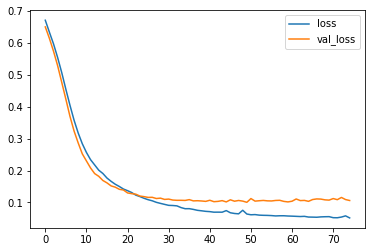

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Third: Adding in DropOut Layers

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6924 - val_loss: 0.6620
Epoch 2/600
426/426 [==============================] - 0s 471us/sample - loss: 0.6787 - val_loss: 0.6435
Epoch 3/600
426/426 [==============================] - 0s 746us/sample - loss: 0.6602 - val_loss: 0.6250
Epoch 4/600
426/426 [==============================] - 0s 868us/sample - loss: 0.6402 - val_loss: 0.6046
Epoch 5/600
426/426 [==============================] - 0s 725us/sample - loss: 0.6070 - val_loss: 0.5816
Epoch 6/600
426/426 [==============================] - 0s 775us/sample - loss: 0.5888 - val_loss: 0.5521
Epoch 7/600
426/426 [==============================] - 0s 441us/sample - loss: 0.5589 - val_loss: 0.5210
Epoch 8/600
426/426 [==============================] - 0s 489us/sample - loss: 0.5604 - val_loss: 0.4957
Epoch 9/600
426/426 [==============================] - 0s 585us/sample - loss: 0.5225 - val_loss: 0.4660
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 523us/sample - loss: 0.1178 - val_loss: 0.0926
Epoch 79/600
426/426 [==============================] - 0s 786us/sample - loss: 0.1219 - val_loss: 0.1042
Epoch 80/600
426/426 [==============================] - 0s 676us/sample - loss: 0.1073 - val_loss: 0.0903
Epoch 81/600
426/426 [==============================] - 0s 702us/sample - loss: 0.1028 - val_loss: 0.1026
Epoch 82/600
426/426 [==============================] - 0s 586us/sample - loss: 0.1140 - val_loss: 0.1014
Epoch 83/600
426/426 [==============================] - 0s 675us/sample - loss: 0.1204 - val_loss: 0.0894
Epoch 84/600
426/426 [==============================] - 0s 784us/sample - loss: 0.1196 - val_loss: 0.0981
Epoch 85/600
426/426 [==============================] - 0s 567us/sample - loss: 0.1141 - val_loss: 0.0965
Epoch 86/600
426/426 [==============================] - 0s 538us/sample - loss: 0.1184 - val_loss: 0.0885
Epoch 87/600
426/426 [========================

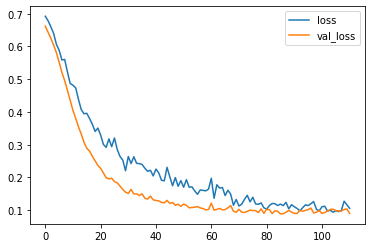

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[52  3]
 [ 1 87]]
